# STA 208: Homework 4(Do not distribute)

## Due Monday 6/2/2019 at midnight

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.  Submit each file separately.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Recall that a Mercer kernel is a similarity function $k(x,x')$ such that the matrix $K_{ij} = ( k(x_i,x_j) )_{ij}$ is positive semidefinite regardless of dataset $\{x_i\}_{i=1}^n \subset \mathbb R^p$.


1. Suppose that $K = U \Lambda U^\top$ where $U$ is $n \times n$ and $\Lambda$ is diagonal.  What do we know about $\Lambda$ and why?
### Answer:

<font color=blue>
    Claim: all elements of the diagonal matrix $\Lambda$ are nonnegative.
    By the definition of positive semidefinite matrix, $\forall x\in \mathbb R^n$, we have
    $$
    x^\top K x\ge 0
    \Rightarrow x^\top U \Lambda U^\top x\ge 0
    $$
    
   Let's denote that $\Lambda=diag(\lambda_1,\lambda_2,\dots,\lambda_n)$ and $U^\top x=(y_1,y_2,\dots,y_n)^\top$, then the above inequality turns out to be
   $$
   \sum_{i=1}^n \lambda_i y_i^2 \ge 0,
   $$
   
   Therefore, for all $i$, $\lambda_i \ge 0$.
</font>

2. Let kernel ridge regression be the following minimization problem where $y \in \mathbb R^n$,
$$
\min_\beta \frac 12 \|y - \beta \|_2^2 + \beta^\top K \beta.
$$
Write the solution as a function of $\Lambda, U, y$.  What does this tell you about the effect of the eigenvalues on the solution (suppose that you only increase one of the eigenvalues).

### Answer:

<font color=blue>
    The target function that we want to minimize is 
    $$
    f(\beta)=\frac 12 \|y - \beta \|_2^2 + \beta^\top K \beta=\frac 12(y^\top y-2y^\top \beta+\beta^\top \beta)+\beta^\top K \beta.
    $$
    
   Taking the derivative with respect to $\beta$ gives us the gradient
   $$
   \nabla f(\beta)=-y+\beta+2K \beta=U(I+2\Lambda) U^\top\beta-y,
   $$
   and setting it to zero yields $\hat\beta=U (I+2\Lambda)^{-1} U^\top y$.
   
   Note that the $l_2$ norm of $\hat\beta$ is
   $$ 
   \|\beta\|_2^2=y^\top U (I+2\Lambda)^{-1} U^\top U (I+2\Lambda)^{-1} U^\top y=y^\top U (I+2\Lambda)^{-2}U^\top y=\sum_{i=1}^n \frac {1} {(1+2\lambda_i)^2} z_i^2,
   $$
   where $U^\top y=(z_1,z_2,\dots,z_n)$.
   
   Suppose that the $j$th eigenvalues $\lambda_j$ increases, the $l_2$ norm of $\hat\beta$ will decrease.
   
</font>

3. Check if the following notions of similarity are Mercer kernels,
 1. $k(x,x') = x^\top x'$
 1. $k(x,x') = x_1 x'_1 - x_2 x_2', \quad x, x' \in \mathbb R^2$ 
 1. $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$ where the sentence structure is the sequence of parts-of-speech for each word/phrase.  For example, "The cat ran around the house." is "noun verb preposition noun" has the same structure as "Steve forgot about the homework".
 
 ### Answer:
 
 __Question 1__
 
 <font color=blue>
    Recall that a Mercer kernel is a similarity function $k(x,x')$ such that the matrix $K_{ij} = ( k(x_i,x_j) )_{ij}$ is positive semidefinite regardless of dataset $\{x_i\}_{i=1}^n \subset \mathbb R^p$. So we can check the notion by judging wether $k(x,x')$ is positive semidefinite.
    
   Based on the definition of positive semidefinite matrix, for all $v\in R^n$, $K$ is positive semidefinite if $v^\top K v\ge 0$. Suppose the sample matrix is $X^\top=(x_1,x_2,\dots,x_n)$, where $x_i$ represents one sample. Then, the matrix $K$ here is $XX^\top$.
   
   $$
   v^\top K v=v^\top XX^\top v=\|X^\top v\|_2^2,
   $$
   which is nonnegative for all $v$. Therefore the notion of similarity $k(x,x') = x^\top x'$ is Mercer Kernel.
   
   </font>
   
 __Question 2__
 
 <font color=blue>
    The matrix $K$ here is $XDX^\top$, where $D=diag(1,-1)$. For all $v\in R^n$ check
    $$
    v^\top K v=v^\top XDX^\top v=y_1^2-y_2^2,
    $$
   where $y=X^\top v$. Since this is not nonnegative for all $v$, then the notion of similarity $k(x,x') = x_1 x'_1 - x_2 x_2'$ is not Mercer Kernel.
   
   </font>
   
 __Question 3__
 
 <font color=blue>
    Claim: the notion of similarity $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$ is Mercer Kernel.
    
   Let $\{s_i\}_{i=1}^n$ denote the sentence samples. We can divide the samples into $M$ groups such that those sentences with the same structure are assigned in one group, say $G_m$. Let $D_m$ denote the index of the samples in $G_m$, ie. $D_m=\{i:s_i\in D_m\}$. Hence, the $ij$-entry of the matrx $K$ is
   
   $$
   k_{ij}=k(s_i,s_j)=\delta_{i,j}=\begin{cases}
   1, & \exists m, i\in D_m, j \in D_m\\
   0, & otherwise
   \end{cases}
   $$
   
   For all $v\in R^n$, check
   $$
   v^\top K v=\sum_{i,j} k_{ij} v_i v_j=\sum_{m=1}^M \sum_{i,j \in D_m} v_i v_j=\sum_{m=1}^M (\sum_{i\in D_m} v_i)^2,
   $$
   which is non-negative. 
   
   Therefore $K$ is positive semi-definite and the notion of similarity $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$ is Mercer Kernel.
    
    

__Exercise 2__ (40 pts)

Load the poses.csv dataset, which is a concatenation of other datasets to form a larger dataset.  I want you to act like the dataset is from the same experiment. 

1. Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

1. Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix of the cluster against the 'task'.  Is there a clear mapping from clusters to task?

1. Standardize the data and train an HMM with an appropriately chosen emission distribution.  How much does the hidden state overlap with the 'task' variable?  

### Question 1:

__Data Preprocessing__

<font color=blue>
     Check the missing values in 'poses.csv', and it turns out that there are some rows that uses a wrong format so that we cannot directly read in. To fix this problem, another method to read in the data is implemented below. In addition, I change the both task "bending1" and "bending2" to "bending".
    
   For the 1 time lag difference, I discard the rows corresping to 0 time after applying 1 time lag difference of the dataset, since those mark the beginning of a new event and the 1 time lag difference with the previous row is meaningless. In the end the 1 time lag difference data have 42151 rows with 6 tasks.

   </font>

__Implement PCA__

<font color=blue>
    
   The first two principal components are the eigen vectors of $XX^\top$ corresponding to the largest two eigenvalues, which is denoted by $v_1,v_2$. The principal components of the $i$th sample is $v_1^\top x_i$ and $v_2^\top x_i$ respectively. The loadings of $j$th variable on the principal components are the $j$th entry of $v_1$,and $v_2$ respectively.
   
   The figure "2 Principal Components" shows the 2 principal components of the 42151 observations after standardization. For the first principal component, the third variable 'avg_rss13' has the most loading, which is 0.60520909; For the second principal component, in terms of the magnitude, the fifth vatiable 'avg_rss23' has the most loading with absolute value 0.62657949.
   
    
   </font>

In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn.decomposition import PCA
import sklearn.preprocessing as preprocess
import re

In [2]:
dataf = pd.read_csv("poses.csv") 
dataf.head()

,Unnamed: 0,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task,filename
0,0,0,42.00,0.00,11.50,4.56,18.50,0.87,sitting,dataset14.csv
1,1,250,41.75,0.43,21.50,1.80,11.75,1.48,sitting,dataset14.csv
2,2,500,41.67,0.47,9.33,5.44,12.00,2.83,sitting,dataset14.csv
3,3,750,40.00,0.82,12.67,0.94,17.75,1.09,sitting,dataset14.csv
4,4,1000,40.25,0.83,12.25,0.43,18.25,0.43,sitting,dataset14.csv


In [3]:
##Check missing values
dataf.isnull().sum()
dataf[dataf.isnull().any(1)].index
# there are 480 rows containing missing values across all variabels from 21119th row to 21598th row.
dataf.loc[21119:21129,]
# By checking closely, it seems that they merge all varibles into one columns causing the missing values.

,Unnamed: 0,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task,filename
21119,0,0 32.50 0.50 0.00 0.00 19.00 1.00,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21120,1,250 32.50 0.50 0.00 0.00 18.50 0.50,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21121,2,500 32.75 0.43 1.00 0.00 18.00 0.00,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21122,3,750 32.50 0.50 0.00 0.00 17.50 0.50,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21123,4,1000 32.50 0.50 7.50 0.50 17.50 0.87,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21124,5,1250 32.67 0.47 11.00 1.00 16.75 0.83,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21125,6,1500 32.50 0.50 6.25 0.83 18.00 0.00,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21126,7,1750 32.50 0.50 3.50 0.87 18.00 0.00,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21127,8,2000 32.33 0.47 6.00 0.00 18.33 0.47,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv
21128,9,2250 32.67 0.47 8.00 0.82 18.00 0.00,NaN,NaN,NaN,NaN,NaN,NaN,bending2,dataset4.csv


In [107]:
#fix the data and check missing values again
lines = []
with open('poses.csv', "r") as input_file:
    lines = [line for line in input_file]#read the raw file in
lines = lines[1:]#delete the header line

data_numbers = [re.findall(r'\b[0-9]+\.?[0-9]*\b', line) for line in lines]#extract all numbers in a line
def get_numbers(list_of_strings):
    return [float(a) for a in list_of_strings]#string to float and separate?
data_numbers = [get_numbers(line) for line in data_numbers]#create a list of numbers

poses = pd.read_csv('poses.csv', dtype=str)#read in all columns as strings
data_matrix = np.array(data_numbers)
poses.iloc[:,:8] = data_matrix#import correct data
print(poses.isnull().sum())
print(poses.loc[:,'task'].value_counts())
poses.head()

Unnamed: 0         0
# Columns: time    0
avg_rss12          0
var_rss12          0
avg_rss13          0
var_rss13          0
avg_rss23          0
var_rss23          0
task               0
filename           0
dtype: int64
walking     7200
standing    7200
cycling     7200
lying       7200
sitting     7199
bending1    3360
bending2    2880
Name: task, dtype: int64


,Unnamed: 0,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task,filename
0,0,0,42,0,11.5,4.56,18.5,0.87,sitting,dataset14.csv
1,1,250,41.75,0.43,21.5,1.8,11.75,1.48,sitting,dataset14.csv
2,2,500,41.67,0.47,9.33,5.44,12,2.83,sitting,dataset14.csv
3,3,750,40,0.82,12.67,0.94,17.75,1.09,sitting,dataset14.csv
4,4,1000,40.25,0.83,12.25,0.43,18.25,0.43,sitting,dataset14.csv


In [108]:
#Here I only want to select columns easier in the future, you can igonre this block.
col_names = poses.columns.values
poses.rename(columns={col_names[0]:'Id', col_names[1]:'Time'}, inplace=True)
poses.head()

,Id,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task,filename
0,0,0,42,0,11.5,4.56,18.5,0.87,sitting,dataset14.csv
1,1,250,41.75,0.43,21.5,1.8,11.75,1.48,sitting,dataset14.csv
2,2,500,41.67,0.47,9.33,5.44,12,2.83,sitting,dataset14.csv
3,3,750,40,0.82,12.67,0.94,17.75,1.09,sitting,dataset14.csv
4,4,1000,40.25,0.83,12.25,0.43,18.25,0.43,sitting,dataset14.csv


In [109]:
#replace both 'bending1' and 'bending2' with 'bending'
poses.task = poses.task.replace(to_replace=['bending1','bending2'], value='bending')
poses.task.unique()

array(['sitting', 'lying', 'walking', 'standing', 'cycling', 'bending'],
      dtype=object)

In [7]:
poses_lag=poses.loc[:,'avg_rss12':'var_rss23'].diff().join(poses.loc[:,['Id','Time','task','filename']])
poses_lag.head()
poses_lag=poses_lag.loc[poses_lag['Time'] !=0]

In [8]:
poses_lag.shape

(42151, 10)

In [9]:
poses_lag_stand=preprocess.scale(poses_lag.loc[:,'avg_rss12':'var_rss23'])
pca = PCA(n_components=2).fit(poses_lag_stand)  
principalcomp=pca.transform(poses_lag_stand)
principalcomp.shape
principalcomp[0:10,:]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype object were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[ 2.2258819 ,  3.42750945],
       [-4.21816609, -1.63670091],
       [ 3.48501539, -0.76327632],
       [ 0.28664804, -0.31652979],
       [-0.32820443,  0.46342825],
       [-2.38259276, -1.1555519 ],
       [-0.01946391,  0.41058587],
       [ 1.03742841,  1.14499656],
       [ 1.08991371,  0.44305633],
       [-0.52154019,  0.50042205]])

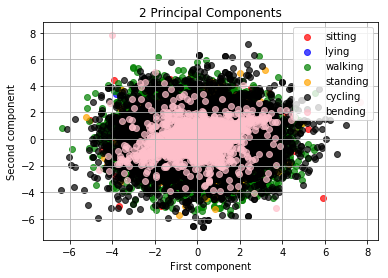

In [10]:
fig, ax = plt.subplots()
color=['red','blue','green','orange','black','pink']
label=['sitting', 'lying', 'walking','standing','cycling','bending']
for i in range(6):
    ind=np.where(poses_lag.loc[:,'task']==label[i])[0]
    ax.scatter(principalcomp[ind,0], principalcomp[ind,1], c=color[i],label=label[i],alpha=0.7)

ax.legend()
ax.grid(True)
plt.title("2 Principal Components")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()

In [11]:
pca.components_
## For the first principal component, the third variable 'avg_rss13' has the most loading;
##  For the second principal component, in terms of magnitude, the fifth vatiable 'avg_rss23' has the most loading.

array([[-0.13640888, -0.23678405,  0.60520909, -0.59936489,  0.32546848,
        -0.30639824],
       [ 0.09096216, -0.09258837,  0.32555174, -0.31339504, -0.62657949,
         0.62157142]])

### Question 2

<font color=blue>
    
   The figure "Confusion matrix of the classifier" illustrates the confusion matrix. We can see that the majority of observations are assigned in 0 cluster. Besides, the observations with "walking" task are evenly assigned to the 6 clusters. So there is no a clear mapping from clusters to task. In order to calculate the accuracy, we need to assign the task to each cluster. Here, we label the cluster by the task which is present in that cluster most frequently than any other task. The proportion of the cluster overlapping with the 'task' variable (accuracy) turns out to be approximate 0.309. Therefore, the K-means is not appropriate here.
    
</font>

In [12]:
##K-means
from sklearn.cluster import KMeans
km=KMeans(n_clusters=6,random_state=0).fit(poses_lag_stand)
cluster=km.labels_
np.unique(cluster, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([26644,  3386,  3158,  3074,  3514,  2375]))

In [13]:
from sklearn.metrics import confusion_matrix
lab = preprocess.LabelEncoder()
code=lab.fit_transform(poses_lag.loc[:,'task'])
labels=range(6)
conf_mat=confusion_matrix(code, cluster,labels)
conf_mat

array([[5300,  312,  128,  125,  331,   31],
       [1145, 1252, 1207, 1092, 1389, 1100],
       [6713,  121,  109,  101,  133,    8],
       [5976,  331,  278,  269,  324,    6],
       [6237,  247,  242,  224,  222,   13],
       [1273, 1123, 1194, 1263, 1115, 1217]])

Text(69.0, 0.5, 'True')

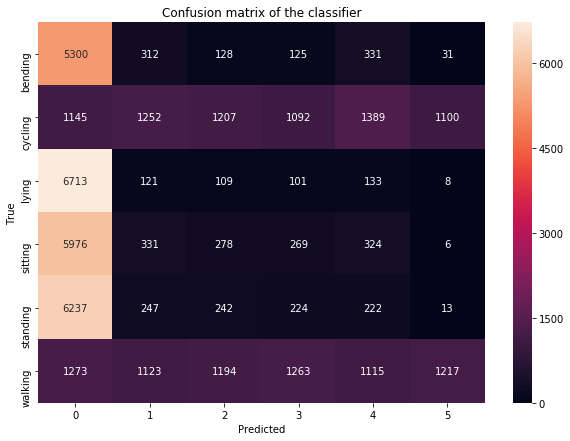

In [80]:
import seaborn as sn
df_cm = pd.DataFrame(conf_mat, index = [i for i in lab.classes_],
                  columns = [i for i in range(6)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [152]:
cluster_lab=np.repeat('cycling',len(cluster))
cluster_lab[np.where(cluster==0)]=lab.classes_[np.argmax(conf_mat[:,0])]
cluster_lab[np.where(cluster==1)]=lab.classes_[np.argmax(conf_mat[:,1])]
cluster_lab[np.where(cluster==2)]=lab.classes_[np.argmax(conf_mat[:,2])]
cluster_lab[np.where(cluster==3)]=lab.classes_[np.argmax(conf_mat[:,3])]
cluster_lab[np.where(cluster==4)]=lab.classes_[np.argmax(conf_mat[:,4])]
cluster_lab[np.where(cluster==5)]=lab.classes_[np.argmax(conf_mat[:,5])]
sum(cluster_lab==poses_lag.loc[:,'task'])/len(cluster)

0.3093876776351688

In [147]:
conf_mat

array([[5300,  312,  128,  125,  331,   31],
       [1145, 1252, 1207, 1092, 1389, 1100],
       [6713,  121,  109,  101,  133,    8],
       [5976,  331,  278,  269,  324,    6],
       [6237,  247,  242,  224,  222,   13],
       [1273, 1123, 1194, 1263, 1115, 1217]])

### Question 3

<font color=blue>
    
In this part, let's start from standardizing the initial data without1 time lag. The figure "Confusion matrix of the HMM classifier" illustrates the confusion matrix by using HMM with Gaussian emission distribution. The choice of Gaussian emissian function is mainly because that the histgram is approximate to Gaussian distribution after standardization. Here, the same strategy is applied to label the cluster and the proportion of the hidden state overlapping with the 'task' variable (accuracy) turns out to be 0.647. Hence, in terms of accurancy, the HMM is superior than K-means for this case but still not good enough.
</font>

In [115]:
from hmmlearn import hmm
poses_stand=preprocess.scale(poses.loc[:,'avg_rss12':'var_rss23']*1)
model = hmm.GaussianHMM(n_components=6)
hmm_gaus=model.fit(poses_stand)
pred=model.predict(poses_stand)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype object were all converted to float64 by the scale function.
  


In [116]:
lab_hmm = preprocess.LabelEncoder()
code_hmm=lab_hmm.fit_transform(poses.loc[:,'task'])
labels=range(6)
hmm_cm=confusion_matrix(code_hmm, pred,labels)
hmm_cm

array([[ 334,   76, 2554,  838,  269, 2169],
       [   3, 3123,    0,    4, 4064,    6],
       [6673,    4,    0,   85,  112,  326],
       [1165,   11,   25, 4119,  767, 1112],
       [ 875,    1,    0, 5418,  707,  199],
       [   0, 6463,    0,    0,  736,    1]])

Text(69.0, 0.5, 'True')

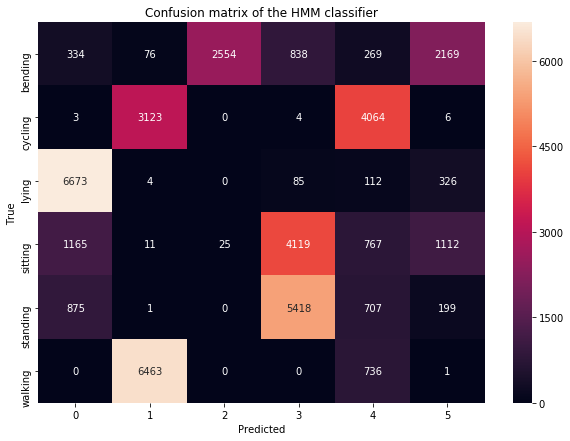

In [117]:
import seaborn as sn
hmm_cm = pd.DataFrame(conf_mat_hmm, index = [i for i in lab_hmm.classes_],
                  columns = [i for i in range(6)])
plt.figure(figsize = (10,7))
sn.heatmap(hmm_cm, annot=True,fmt="d")
plt.title('Confusion matrix of the HMM classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [151]:
cluster_lab_hmm=np.repeat('nonenosng',len(pred))
cluster_lab_hmm[np.where(pred==0)]=lab_hmm.classes_[np.argmax(hmm_cm[:,0])]
cluster_lab_hmm[np.where(pred==1)]=lab_hmm.classes_[np.argmax(hmm_cm[:,1])]
cluster_lab_hmm[np.where(pred==2)]=lab_hmm.classes_[np.argmax(hmm_cm[:,2])]
cluster_lab_hmm[np.where(pred==3)]=lab_hmm.classes_[np.argmax(hmm_cm[:,3])]
cluster_lab_hmm[np.where(pred==4)]=lab_hmm.classes_[np.argmax(hmm_cm[:,4])]
cluster_lab_hmm[np.where(pred==5)]=lab_hmm.classes_[np.argmax(hmm_cm[:,5])]
sum(cluster_lab_hmm==poses.loc[:,'task'])/len(pred)

0.6472927862875542

__Exercise 3__ (40 pts)


Load the housing.csv dataset, your task is to predict the Sale price.  Deal with the missing data by simple imputation and by creating missingness indicator variables.  Train random forests, gradient tree boosting (XGBoost), K-nearest neighbors, and kernel SVMs.  Compare them using appropriate cross-validation.

__1. Data Preprocessing__

<font color=blue>
    
   The housing dataset contains lost of missing values in both numerical predictors and categorical predictors. For numerical predictors, simple imputation with sample mean is applied. For categorical predictors, we take the missing value as a new category and creat indicator varibales. Finally, there are 304 predictors in total.
   
   </font>

In [4]:
housing= pd.read_csv("housing.csv") 
housing
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
house_cov=housing.drop('SalePrice',1)

In [6]:
num = house_cov.select_dtypes(include=[np.number])
num = num.fillna(num.mean())
cate = house_cov.select_dtypes(include=['object'])
cate=cate.fillna('missing')
cate_fac=pd.get_dummies(cate)

__2. Standardization and Training__

<font color=blue>
    In this part, Standardization process is only applied to those numerical predictors and reponse variable "SalePrice". Then split the whole dataset into training set and testing set with 0.22 test size. Tune parameters by cross validation on training set for random forests, gradient tree boosting, K-nearest neighbors and kernel SVMs. The results can be compared in the table below.
    
   <table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
   <tr><td></td><td>random forests</td><td>XGBoost</td><td>KNN</td><td>kernel SVMs</td></tr>
   <tr><td>Tuning Parameters</td><td>'max_depth'; 'max_features'</td><td>'learning_rate'; 'reg_alpha'; 'reg_lambda'; 'max_depth'</td><td>'n_neighbors'; 'p'; 'weights' </td><td>'kernel';'C';'gamma'</td></tr>
   <tr><td>Best parameters</td><td>30; 'sqrt'</td><td>0.1;0.5;0.5;10</td><td>5;1;'distance'</td><td>'rbf';1;'scale'</td></tr>
   <tr><td>Best Score(R_square)</td><td>0.833</td><td>0.803</td><td>0.804</td><td>0.857</td></tr>
   <tr><td>Test Score(R_square）</td><td>0.854</td><td>0.834</td><td>0.812</td><td>0.902</td></tr>
   <tr><td>MSE</td><td>0.133</td><td>0.152</td><td>0.172</td><td>0.090</td></tr>
</table>

Therefore, the svr model with 'rbf' kernel, C=1, and gamma=scale may be the best one in terms of MSE, though the ramdom forest also performs well.

In [7]:
num_stand=preprocess.scale(num.drop('Id',1).values)
X_half_stand=np.concatenate((num_stand, cate_fac.values), axis=1)
y=housing.loc[:,'SalePrice'].values
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
y_stand=preprocess.scale(y)
X_tr_h,X_te_h,y_tr_h,y_te_h=model_selection.train_test_split(X_half_stand,y_stand,test_size = .22,random_state=44)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
parameters = {'max_depth':[10,20,30,40,60], 'max_features':("auto","sqrt","log2")}
r_forest_h =RandomForestRegressor(n_estimators=100)
cv_forest_h = GridSearchCV(r_forest_h, parameters, cv=5)
cv_forest_h.fit(X_tr_h, y_tr_h)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, 30, 40, 60], 'max_features': ('auto', 'sqrt', 'log2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
cv_forest_h.best_params_ 
#'max_depth': 30, 'max_features': 'sqrt'
cv_forest_h.best_score_
#0.8326826645045186
cv_forest_h.best_estimator_
cv_forest_h.best_estimator_.score(X_te_h, y_te_h, sample_weight=None)
#0.8544933513792606
y_forest_h=cv_forest_h.best_estimator_.predict(X_te_h)
mse_forest_h=np.mean((y_forest_h-y_te_h)**2)
mse_forest_h
#0.13293589624009577

0.8532360137530346

In [75]:
import xgboost as xgb
parameters_xgb = {'learning_rate':[0.01,0.1,0.5,0.8], 'reg_alpha':[0.01,0.5],'reg_lambda':[0.01,0.5],'max_depth':[10,30,50,80]}
xgb_h =xgb.XGBRegressor(n_estimators=100,objective='reg:squarederror')
cv_xgb_h = GridSearchCV(xgb_h, parameters_xgb, cv=5)
cv_xgb_h.fit(X_tr_h, y_tr_h)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.8], 'reg_alpha': [0.01, 0.5], 'reg_lambda': [0.01, 0.5], 'max_depth': [10, 30, 50, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
cv_xgb_h.best_params_ 
#'learning_rate': 0.1, 'max_depth': 10, 'reg_alpha': 0.5, 'reg_lambda': 0.5
cv_xgb_h.best_score_ 
#0.8027443780821132
cv_xgb_h.best_estimator_.score(X_te_h, y_te_h, sample_weight=None)
#0.8336857760091754
y_xgb_h=cv_xgb_h.best_estimator_.predict(X_te_h)
mse_xgb_h=np.mean((y_xgb_h-y_te_h)**2)
mse_xgb_h
#0.15194584325368798

0.8336857760091754

In [79]:
from sklearn.neighbors import KNeighborsRegressor
neigh_h = KNeighborsRegressor()
parameters_n = {'n_neighbors':[2,5,10,20,30,50], 'p':[1,2],'weights':("uniform","distance")}
cv_neigh_h = GridSearchCV(neigh_h, parameters_n, cv=5)
cv_neigh_h.fit(X_tr_h, y_tr_h)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 5, 10, 20, 30, 50], 'p': [1, 2], 'weights': ('uniform', 'distance')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
cv_neigh_h.best_params_ 
cv_neigh_h.best_score_
#0.803699785930388
cv_neigh_h.best_estimator_
# 'n_neighbors': 5, 'p': 1, 'weights': 'distance'
cv_neigh_h.best_estimator_.score(X_te_h, y_te_h, sample_weight=None)
#0.8116995665819975
y_neigh_h=cv_neigh_h.best_estimator_.predict(X_te_h)
mse_neigh_h=np.mean((y_neigh_h-y_te_h)**2)
mse_neigh_h
#0.17203259862073958

0.8116995665819975

In [8]:
from sklearn.svm import SVR
svr_h=SVR()
parameters_svr = {'kernel':("linear","poly","rbf","sigmoid"),'C':[0.01,1,10,50],'gamma':['auto','scale']}
cv_svr_h = GridSearchCV(svr_h, parameters_svr, cv=5)
cv_svr_h.fit(X_tr_h, y_tr_h)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': [0.01, 1, 10, 50], 'gamma': ['auto', 'scale']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
cv_svr_h.best_params_ 
#'C': 1, 'gamma': scale, 'kernel': 'rbf'
cv_svr_h.best_score_ 
#0.8565540336476686
cv_svr_h.best_estimator_.score(X_te_h, y_te_h, sample_weight=None)
#0.9015482531630113
y_svr_h=cv_svr_h.best_estimator_.predict(X_te_h)
mse_svr_h=np.mean((y_svr_h-y_te_h)**2)
mse_svr_h
#0.08994620744988192

0.08994620744988192